In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('./ML data/titanic_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Age'].isnull().sum()

0

In [5]:
df['Cabin'].fillna('N', inplace=True)
df['Embarked'].fillna('N', inplace=True)

In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
F33              3
              ... 
C54              1
A7               1
A31              1
E58              1
B101             1
Name: Cabin, Length: 148, dtype: int64

In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [11]:
# Cabin Data 정리
# Cabin 등급만 표시
df['Cabin'] = df['Cabin'].str[:1]
df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [12]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

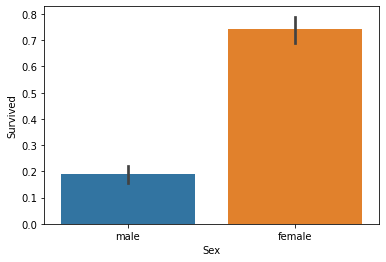

In [13]:
sns.barplot(data=df, x='Sex', y='Survived')

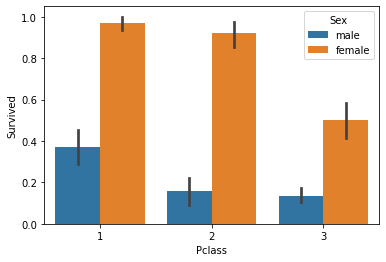

In [14]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

In [15]:
# Age 범주화 함수 사용
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat ='Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat ='Elderly'
        
    return cat


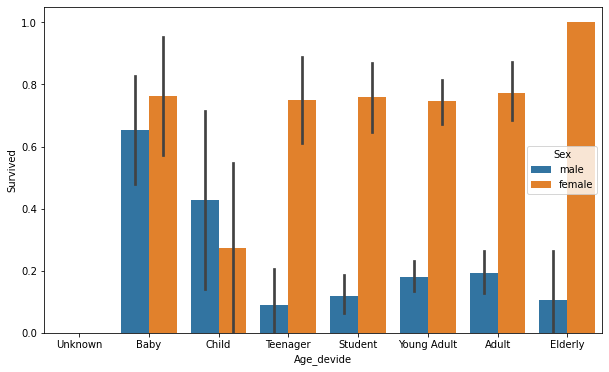

In [16]:
plt.figure(figsize=(10,6))
group_name = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
# Age 범주화 작업
df['Age_devide'] = df['Age'].apply(lambda x: get_category(x))

sns.barplot(data=df, x='Age_devide', y='Survived', hue='Sex', order=group_name)

In [17]:
# 만든 Column 인 'Age Devide' 제거
df.drop('Age_devide', axis=1, inplace=True)

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,N,S
1,1,1,female,38.000000,1,0,71.2833,C,C
2,1,3,female,26.000000,0,0,7.9250,N,S
3,1,1,female,35.000000,1,0,53.1000,C,S
4,0,3,male,35.000000,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,N,S
887,1,1,female,19.000000,0,0,30.0000,B,S
888,0,3,female,29.699118,1,2,23.4500,N,S
889,1,1,male,26.000000,0,0,30.0000,C,C


In [20]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

df = encode_features(df)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


In [21]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [22]:
df
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


In [23]:
# 머신러닝에 사용할 Data 나누기
y_df = df['Survived']
x_df = df.drop('Survived', axis=1, inplace=True)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [24]:
y_df

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, y_df, 
                                                    test_size=0.2, random_state=11)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [27]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [28]:
# DecisionTree
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('정확도: ', accuracy_score(y_test, dt_pred))

정확도:  0.7877094972067039


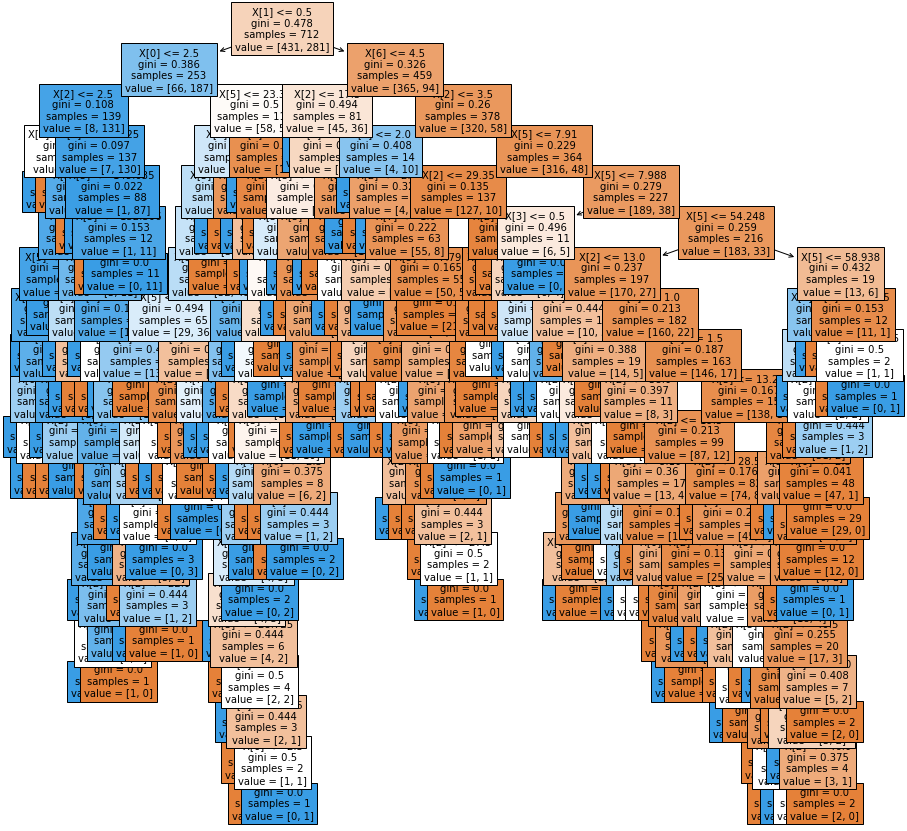

In [43]:
plt.figure(figsize=(15,15))
tree = plot_tree(dt_clf,fontsize=10,filled=True)

In [30]:
# RandomForest
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('정확도: ', accuracy_score(y_test, rf_pred))

정확도:  0.8547486033519553


In [31]:
# LogisticRegression
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('정확도: ', accuracy_score(y_test, lr_pred))

정확도:  0.8491620111731844


C:\Users\BIT_R45\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# cross_val_score 사용
from sklearn.model_selection import cross_val_score

In [33]:
scores = cross_val_score(dt_clf, df, y_df, cv=5)
scores

array([0.74301676, 0.7752809 , 0.79213483, 0.78651685, 0.84269663])

In [34]:
np.mean(scores)

0.7879291946519366

In [35]:
# GridSearchCV 활용하여 최적값 찾기
from sklearn.model_selection import GridSearchCV

In [36]:
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
             'min_samples_split': [2, 3, 4, 5],
             'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8]}

In [37]:
y_train

333    0
662    0
382    0
331    0
149    0
      ..
269    1
337    1
91     0
80     0
703    0
Name: Survived, Length: 712, dtype: int64

In [38]:
grid_dt = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [39]:
print('최적: ', grid_dt.best_params_)

최적:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}


In [40]:
print('최고 정확도: ', grid_dt.best_score_)

최고 정확도:  0.8062346104599627


In [41]:
best_dclf = grid_dt.best_estimator_

In [42]:
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
accuracy

0.8659217877094972

In [45]:
# GridSearchCV는 시각화가 따로 없다
# plt.figure(figsize=(15,15))
# tree = plot_tree(grid_dt,fontsize=10,filled=True)